Изработил: Стефан Крстевски, 223/2017

# <center>Проектна задача по Машинско учење</center>
## <center>Kласификација на небесни објекти</center>

##### Целта на овој проект е да се создаде систем за класификација на небесните објекти врз основа на нивните спектрални карактеристики. Проектот ќе вклучува користење на Python за анализа и визуелизација на податоците од ѕвездените спектри и развој на модел за класификација користејќи алгоритми за машинско учење. Моделот ќе биде дизајниран да ги подредува објектите во три главни групи: галаксии, квазари и ѕвезди. Проектот има за цел да обезбеди точна и ефикасна алатка за астрономите да ги класифицираат и проучуваат небесните објекти и да го продлабочат нашето разбирање за структурата и еволуцијата на универзумот.

## Содржина

0. [Вчитување на потребни библиотеки](#bib)
1. [Опис на проблемот кој се решава](#opis)
     - [Податочно множество](#pod)
     - [Предпроцесирање на податоците](#clean)
     - [Визуелизација на податоците](#viz)
     - [Опис на користените метрики](#met)
2. [Решавање на проблемот](#res)
     - [Решавање со помош на Random Forest](#met1)
     - [Решавање со помош на SVM (Support Vector Machines)](#met2)
     - [Решавање со помош на Logistic Regression](#met3)
3. [Споредба на резултатите](#spor)
4. [Заклучок](#zakl)
5. [Користена литература и ресурси](#resources)

## 0. Вчитување на потребни библиотеки <a id='bib'></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from collections import Counter

## 1. Опис на проблемот кој се решава <a id='opis'></a>

Проблемот се состои од големо множество на небесните објекти и нивна класификација во зависност од нивните спектрални карактеристики.

Мотивација за избирање на овој проблем е поради мојот интерес кон вселената и небесните тела во нејзе.

### 1.1. Податочно множество <a id='pod'></a>

In [13]:
ignored_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df = pd.read_csv('star_classification.csv', usecols=lambda col: col not in ignored_columns)

### 1.2. Предпроцесирање на податоците <a id='clean'></a>

Колоните кои се игнорираат при читањето на фајлот се оние колони кој немаат никаква практична примена во проектната задачи поради нивната природа како идетификациски броеви или сл. Идејата на проектната задача е калсификација спорет спектралните карактеристики, иако игнорираните колони може во некои случаи да придонесат до поголема точност.

<b>obj_ID</b> = Object Identifier, уникатна вредност што го идентификува објектот во каталогот со слики што го користи CAS (Catalog Archive Server)

<b>alpha</b> = Десно воздигнување (RA или alpha) е фундаментален концепт во астрономијата што се користи за одредување на координатата исток-запад на позицијата на небесниот објект на небото.  (според J2000).

<b>delta</b> = Деклинацијата (delta) е фундаментален концепт во астрономијата што се користи за одредување на координатата север-југ на позицијата на небесниот објект на небото. (според J2000).

<b>J2000</b> е специфична временска точка што се користи како референца за небесните координати. J2000 е кратенка за Julian Date 2000, што одговара на 1 јануари 2000 година, во 12:00 TT. Тоа е најчесто користена епоха за астрономски пресметки и координати.

<b>u</b> = (Ultraviolet filter) Во фотометрискиот систем, ултравиолетовиот (UV) филтер е специфичен тип на оптички филтер кој се користи за селективно пренесување на светлината во ултравиолетовиот регион на електромагнетниот спектар. Фотометриските системи се користат за мерење на интензитетот или осветленоста на светлината емитирана или рефлектирана од небесните објекти.

<b>g</b> = (Green filter) Во фотометрискиот систем, зелениот филтер е специфичен оптички филтер кој се користи за селективно пренесување на светлината во зелениот регион на видливиот спектар. Терминот „Зелен филтер“ се однесува на филтер дизајниран да ја мери привидната големина на небесните објекти во зелениот опсег на бранова должина.

<b>r</b> = (Red filter) Во фотометрискиот систем, Црвениот филтер е оптички филтер специјално дизајниран да селективно пренесува светлина во црвениот регион на видливиот спектар. Терминот „Црвен филтер“ се однесува на филтер што се користи за мерење на привидната големина на небесните објекти во опсегот на црвената бранова должина.

<b>i</b> = (Near Infrared filter) Во фотометрискиот систем, блискиот инфрацрвен филтер (NIR) е оптички филтер дизајниран да селективно пренесува светлина во блискиот инфрацрвен регион на електромагнетниот спектар. Терминот „близок инфрацрвен филтер“ се однесува на филтер што се користи за мерење на привидната големина на небесните објекти во опсегот на блиската инфрацрвена бранова должина.

<b>z</b> = (Infrared filter) Во фотометрискиот систем, инфрацрвениот (IR) филтер е оптички филтер дизајниран да селективно пренесува светлина во инфрацрвениот регион на електромагнетниот спектар. Терминот „Инфрацрвен филтер“ се однесува на филтер што се користи за мерење на привидната големина на небесните објекти во опсегот на инфрацрвена бранова должина.

<b>run_ID</b> = (Run Number) се користи за идентификување на конкретното скенирање

<b>rereun_ID</b> = (Rerun Number) број со кој се одредува како е обработена сликата

<b>cam_col</b> = (Camera column) број за идентификација на скенирање во рамките на (Run Number)

<b>field_ID</b> = (Field number) број за идентификација на секое поле

<b>spec_obj_ID</b> = Уникатен ID што се користи за оптички спектроскопски објекти (ова значи дека 2 различни набљудувања со иста spec_obj_ID мора да ја делат излезна класа)

<b>class</b> = класа на објектот (галаксија, ѕвезда или квазар)

<b>redshift</b> = (redshift value) е мерка за тоа колку брановата должина на светлината од далечен објект е растегната или зголемена поради ширењето на универзумот.

<b>plate</b> = (plate ID) идентификациси ID на секој објект според SDSS (Sloan Digital Sky Survey)

<b>MJD</b> =  Modified Julian Date (MJD) се користи за да покаже кога е земен одреден податок. MJD е континуирано броење на денови, каде што почетната точка е дефинирана како полноќ на 17 ноември 1858 година (по јулијанскиот календар).

<b>fiber_ID</b> = (fiber ID) идентификациси ID на влакното што ја насочувало светлината кон фокусната рамнина при секое набљудување

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [15]:
df.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

In [16]:
display(df[0:10].T)

,0,1,2,3,4,5,6,7,8,9
alpha,135.689107,144.826101,142.18879,338.741038,345.282593,340.995121,23.234926,5.433176,200.290475,39.149691
delta,32.494632,31.274185,35.582444,-0.402828,21.183866,20.589476,11.418188,12.065186,47.199402,28.102842
u,23.87882,24.77759,25.26307,22.13682,19.43718,23.48827,21.46973,22.24979,24.40286,21.74669
g,22.2753,22.83188,22.66389,23.77656,17.58028,23.33776,21.17624,22.02172,22.35669,20.03493
r,20.39501,22.58444,20.60976,21.61162,16.49747,21.32195,20.92829,20.34126,20.61032,19.17553
i,19.16573,21.16812,19.34857,20.50454,15.97711,20.25615,20.60826,19.48794,19.4649,18.81823
z,18.79371,21.61427,18.94827,19.2501,15.54461,19.54544,20.42573,18.84999,18.95852,18.65422
class,GALAXY,GALAXY,GALAXY,GALAXY,GALAXY,QSO,QSO,GALAXY,GALAXY,STAR
redshift,0.634794,0.779136,0.644195,0.932346,0.116123,1.424659,0.586455,0.477009,0.660012,-0.000008


### 1.3. Визуелизација на податоците <a id='viz'></a>

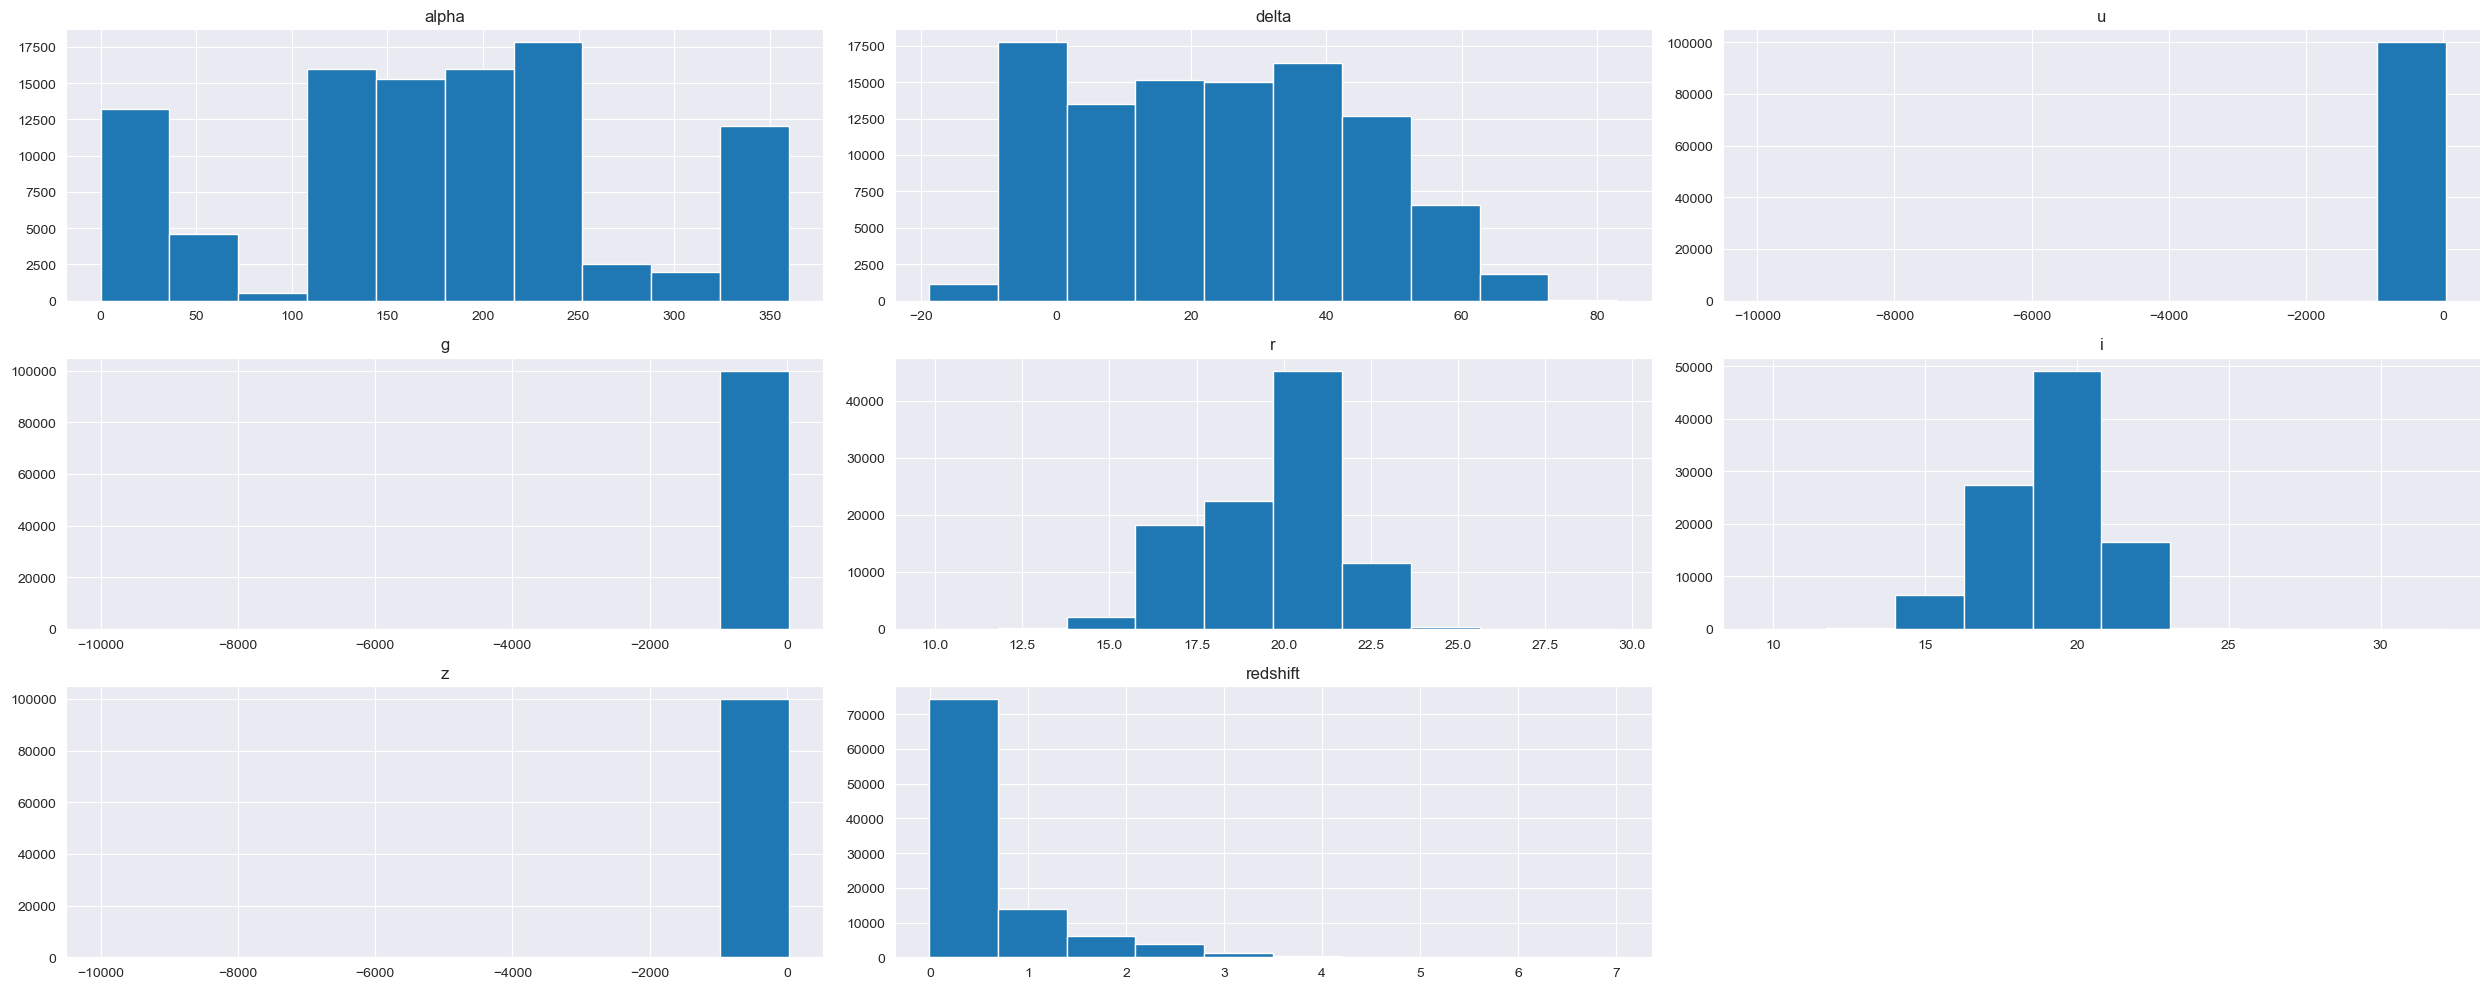

In [17]:
df.hist(figsize=(25, 10))
plt.tight_layout()
plt.show()

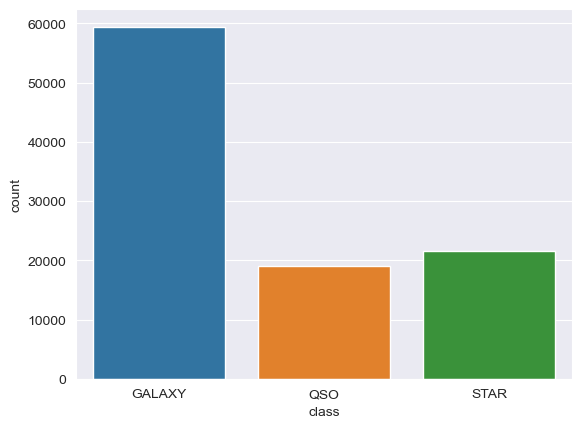

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [18]:
sns.countplot(data=df, x='class')
plt.show()

df['class'].value_counts()

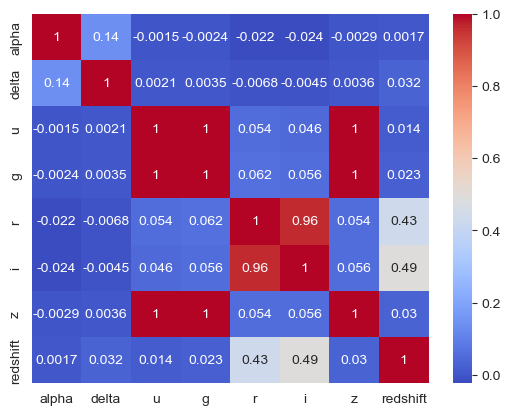

In [19]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Балансираноста на податоците е нерамотежена, Галаксии има во најглолем број 59445, Ѕвезди 21594 и Квазари 18961. Оваа нерамнотежа може да влијае на перформансите на моделите за класификација и треба внимателно и размисли за потребата од справување со дисбалансот на класите.

Во визуелизација на на податоците како и во понатамошното решавање им даваме значење на карактериститите од податочното множество кој е од спектрален карактер.

Податочното множество е целосно односно не е забележана колона во коа имаме недостиг на податоци.

### 1.4. Опис на користените метрики <a id='met'></a>

df.info(): Oбезбедува приказ на информации од податочно множество, вклучувајќи ги имињата на колоните, типовите на податоци и бројот на не-нулти вредности во секоја колона. Тоа е корисно за да се добие преглед на податоците и да се идентификуваат вредностите што недостасуваат.

df.isnull().sum(): Обезбедува приказ на бројот на null елементи во секој податок.

df[0:10].T: Овој код ги избира првите десет редови од податочно множество и го транспонира користејќи го атрибутот .T.

df.hist(figsize=(10, 8)): Овој метод генерира хистограми за секоја нумеричка колона од податочно множество. Хистограмите се користат за да се визуелизира распределбата на вредностите во една променлива.

sns.countplot(data=df, x='class'): Овој Seaborn метод создава countplot, што е табла што го прикажува бројот на набљудувања во секоја категорија на категорична променлива. Во овој случај, го прикажува бројот на различни класи присутни во колоната „class“.

correlation_matrix = df.corr(numeric_only=True): Овој код ја пресметува корелацијата помеѓу нумеричките колони во податочно множество. Numeric_only=True параметарот гарантира дека само нумеричките колони се вклучени во пресметката на корелацијата.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm'): Овој Seaborn метод создава матрицата за корелација. Oбезбедува визуелна ознака на корелација , овозможувајќи да идентификува односи помеѓу различни променливи.

## 2. Решавање на проблемот <a id='res'></a>

In [40]:
y = df["class"]
X = df.drop("class", axis="columns")

#### Поделба на множествa


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 8), (25000, 8), (75000,), (25000,))

In [42]:
class_counts_original = Counter(y)
print("Original Dataset:")
for class_label, count in class_counts_original.items():
    print(f"Class {class_label}: {count}")

class_counts_train = Counter(y_train)
print("\nTraining Set:")
for class_label, count in class_counts_train.items():
    print(f"Class {class_label}: {count}")

class_counts_test = Counter(y_test)
print("\nTest Set:")
for class_label, count in class_counts_test.items():
    print(f"Class {class_label}: {count}")

Original Dataset:
Class GALAXY: 59445
Class QSO: 18961
Class STAR: 21594

Training Set:
Class STAR: 16195
Class QSO: 14221
Class GALAXY: 44584

Test Set:
Class GALAXY: 14861
Class QSO: 4740
Class STAR: 5399


Поделбата на тест и тренинг множеството по калси е иста со онаа на оригиналната распределба на класата од податочното множество, овој начин на поделба на множествата е посебно добар за оние податочни множества во кои имаме неурамнотеженост на класите како во дадениот случај.

### 2.1. Решавање со помош на Random Forest <a id='met1'></a>

Random Forest алгоритмот имаа три главни хиперпараметри, кои треба да се постават пред тренинг. Тие ја вклучуваат големината на јазолот, бројот на стебла и бројот на карактеристики од кои се земаат примероци. Оттука, класификаторот на случаен шуми може да се користи за решавање на проблеми со регресија или класификација.

Random Forest алгоритмот е составен од збирка стебла на одлучување, а секое дрво во ансамблот се состои од примерок на податоци извлечен од сет за тренирање. Од тој сет за обука, една третина од него се издвојува како податоци за тестирање. Друг пример на случајност потоа се вбризгува преку определување карактеристики, додавајќи поголема разновидност на датата на податоци и намалувајќи ја корелацијата помеѓу стеблата на одлуки. Во зависност од видот на проблемот, определувањето на предвидувањето ќе варира. За задачата за регресија, поединечните стебла на одлуки ќе бидат просечни, а за задачата за класификација, мнозинството гласови - т.е. најчестата категорична променлива - ќе ја даде предвидената класа.

#### Тренирање и евалуација

In [22]:
r_forest = RandomForestClassifier()

cv_scores = cross_val_score(r_forest, X_train, y_train, cv=5)
rf_best_score = np.mean(cv_scores)

r_forest.fit(X_train,y_train)
predicted = r_forest.predict(X_test)

rf_precision = precision_score(y_test, predicted, average='weighted')
rf_recall = recall_score(y_test, predicted, average='weighted')

print('Cross-Validation Score: %.3f' % rf_best_score)
print('Precision: %.3f' % rf_precision)
print('Recall: %.3f' % rf_recall)

Cross-Validation Score: 0.977
Precision: 0.978
Recall: 0.978


In [23]:
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14705   157    33]
 [  362  4406     1]
 [    2     0  5334]]


In [24]:
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     14895
         QSO       0.97      0.92      0.94      4769
        STAR       0.99      1.00      1.00      5336

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



### 2.2. Решавање со помош на SVM <a id='met2'></a>

SVM претставува модел на учење со надзор кој воглавно се применува за класификација, но истиот пренаменет модел наоѓа примена и во областа на регресија. Една од главните карактеристики на овој модел е неговата робустност при предвидување. Поради тоа тој уште се нарекува класификатор кој наоѓа граница на предвидување со максимално растојание од точките на податочното множество.

SVM работи со мапирање на податоците во високодимензионален простор за карактеристики, така што податочните точки може да се категоризираат, дури и кога податоците не се линеарно раздвојливи. Се наоѓа раздвојувач помеѓу категориите, а потоа податоците се трансформираат на таков начин што сепараторот може да се нацрта како хиперрамнина. По ова, карактеристиките на новите податоци може да се користат за предвидување на групата на која треба да припаѓа новиот запис.

#### Тренирање и евалуација

In [25]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)

cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_best_score = np.mean(cv_scores)

svm_clf.fit(X_train,y_train)

predicted = svm_clf.predict(X_test)
svm_precision = precision_score(y_test, predicted, average='weighted')
svm_recall = recall_score(y_test, predicted, average='weighted')

print('Cross-Validation Score: %.3f' % svm_best_score)
print('Precision: %.3f' % svm_precision)
print('Recall: %.3f' % svm_recall)

Cross-Validation Score: 0.724
Precision: 0.786
Recall: 0.736


In [26]:
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14570   310    15]
 [ 1146  3621     2]
 [ 4976   151   209]]


In [27]:
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.70      0.98      0.82     14895
         QSO       0.89      0.76      0.82      4769
        STAR       0.92      0.04      0.08      5336

    accuracy                           0.74     25000
   macro avg       0.84      0.59      0.57     25000
weighted avg       0.79      0.74      0.66     25000



### 2.3. Решавање со помош на Logistic Regression <a id='met2'></a>

Логистичка регресија е статистички модел кој се користи за бинарна и повеќекласна класификација. Логистичката регресија ја проценува веројатноста да се случи некој настан, како што се гласаше или не гласаше, врз основа на дадена база на податоци од независни променливи. Бидејќи исходот е веројатност, зависната променлива е ограничена помеѓу 0 и 1. Во логистичка регресија, логитна трансформација се применува на шансите - односно, веројатноста за успех поделена со веројатноста за неуспех. Ова е исто така познато како лог шанси, или природен логаритам на коефициенти.

#### Тренирање и евалуација

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
lr_model = LogisticRegression(tol=1e-12, C=0.45e-2, fit_intercept=True, max_iter=1000, n_jobs=-1, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.0045, max_iter=1000, n_jobs=-1, tol=1e-12)

In [30]:
lr_model.n_iter_

array([44])

In [31]:
lr_model.coef_

array([[ 2.22761469e-03, -6.98938065e-02,  7.00501319e-01,
         4.46641395e-01,  1.04695392e+00, -1.22881668e+00,
        -1.84775120e-01,  1.23103916e+00],
       [ 5.99657825e-02,  1.21649938e-01, -5.08359246e-01,
        -2.34168093e-01, -1.46849912e+00,  1.17096133e+00,
         2.57231201e-01,  3.99575040e+00],
       [-6.21933972e-02, -5.17561313e-02, -1.92142074e-01,
        -2.12473303e-01,  4.21545200e-01,  5.78553508e-02,
        -7.24560809e-02, -5.22678956e+00]])

In [32]:
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)  # Adjust the number of folds as desired
lr_best_score = np.mean(cv_scores)
lr_precision = precision_score(y_test, predicted, average='weighted')
lr_recall = recall_score(y_test, predicted, average='weighted')

print('Cross-Validation Score: %.3f' % lr_best_score)
print('Precision: %.3f' % lr_precision)
print('Recall: %.3f' % lr_recall)

Cross-Validation Score: 0.905
Precision: 0.786
Recall: 0.736


In [33]:
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[14570   310    15]
 [ 1146  3621     2]
 [ 4976   151   209]]


In [34]:
class_report = classification_report(y_test, predicted)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.70      0.98      0.82     14895
         QSO       0.89      0.76      0.82      4769
        STAR       0.92      0.04      0.08      5336

    accuracy                           0.74     25000
   macro avg       0.84      0.59      0.57     25000
weighted avg       0.79      0.74      0.66     25000



## 3. Споредба на резултатите <a id='spor'></a>

Random Forest има точност, прецизноста и способност на откривање позитивни случаи од 0,977. Ова покажува дека моделот добро ги предвидува и позитивните и негативните случаи.

SVM има точност и способност на откривање на позитивни случаи од 0,736 додека пак прецизност од 0,786. Прецизноста е подобрена во споредба со точноста, додека пак способност на откривање на позитивни случаи остана иста со точноста. Ова сугерира дека моделот е добар во пронаоѓање точни позитивни предвидувања, но има ограничебна способност да ги пронајде сите.

Логистичка регресија има точност од 0,911, со прецизност од 0,786 и способност на откривање на позитивни случаи од 0,736. И прецизноста и способност на откривање на позитивни случаи се слични како кај моделот SVM. Ова покажува дека логистичката регресија функционира слично како SVM.

Во однос на вкупните перформанси, Random Forest има најголема точност, прецизност и способност на откривање на позитивни случаи. Додека пак моделите SVM и логистичка регресија имаат помала способност на откривање на позитивни случаи.

Прецизноста и способност на откривање на позитивни случаи обезбедуваат вредни сознанија за перформансите на моделот покрај точноста, овозможувајќи да се оцени неговото однесување во различни аспекти.

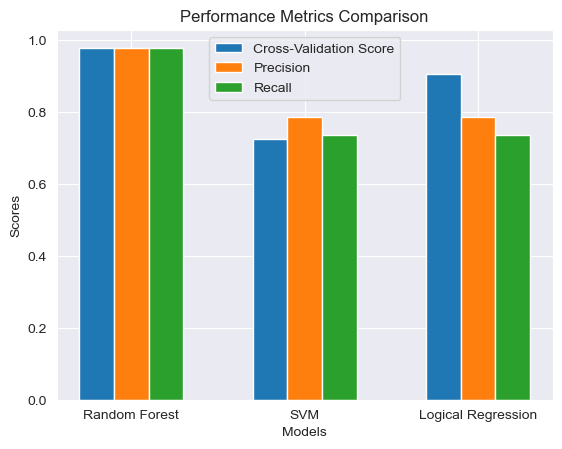

In [35]:
models = ['Random Forest', 'SVM', 'Logical Regression']
accuracy = [rf_best_score, svm_best_score, lr_best_score]
precision = [rf_precision, svm_precision, lr_precision]
recall = [rf_recall, svm_recall, lr_recall]

x = range(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy, width, label='Cross-Validation Score')
rects2 = ax.bar([i + width for i in x], precision, width, label='Precision')
rects3 = ax.bar([i + (2 * width) for i in x], recall, width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()

## 4. Заклучок <a id='zakl'></a>

Oвој проект успешно развива систем за класификација на небесните објекти врз основа на нивните спектрални карактеристики. Со искористување на алгоритмите за машинско учење и анализирање на податоците од ѕвездените спектри користејќи Python, Random Forest се покажа како најперспективен модел, постигнувајќи точност, прецизност и способност на откривање на позитивни случаи од 0,978.

## 5. Користена литература и ресурси <a class="anchor" id="resources"></a>

1. https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
2. https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.
3. https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-how-svm-works
4. https://www.ibm.com/topics/logistic-regression